In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Functions

In [2]:
def convert_to_percents(s):
    return np.round(s / sum(s) * 100, 2)

In [3]:
convert_to_percents(make_array(2,4,6,8))

array([10., 20., 30., 40.])

In [4]:
# make a function that doubles a number
def double(x):
    return 2 * x

In [5]:
double(2)

4

In [6]:
y = 5
double(y)

10

In [7]:
y
double_y = double(y)
double_y, y

(10, 5)

In [8]:
# make a function that doubles a number
def double(x):
    """
    Returns twice the input variable
    """
    return 2 * x

*Make sure to add doc strings*
#### Help(function)

In [9]:
help(double)

Help on function double in module __main__:

double(x)
    Returns twice the input variable



#### Scope
Does the value of a name change?

In [10]:
y = 10
double(y / 10)

2.0

What is the value of y?

#### Multiple Arguments & Default Arguments

In [11]:
def double_and_multiply(arg1, arg2):
    """
    Computes and returns the value of 2*arg1 * 2*arg2
    """
    return double(arg1) * double(arg2)

In [12]:
double_and_multiply(3, 6)

72

In [13]:
def double_and_multiply2(arg1, arg2=1):
    """
    Computes and returns the value of 2*arg1 * 2*arg2.
    arg2 defaults to 1
    """
    return double(arg1) * double(arg2)

In [14]:
double_and_multiply2(5), double_and_multiply2(5,1)

(20, 20)

back to slides

# `Apply`ing functions to Tables

In [15]:
def cut_off_at_a_billion(x):
    '''
    Returns x if x is less than 1e9, otherwise returns 1e9
    '''
    if x > 1e9:
        return 1e9
    return x

In [16]:
cut_off_at_a_billion(1)

1

In [17]:
cut_off_at_a_billion(1e10)

1000000000.0

In [18]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


### Apply billion cut off function to a Column and add it to the table

In [19]:
gross_adjusted_capped = top_movies.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
top_movies = top_movies.with_column('gross_adjusted_capped', gross_adjusted_capped)

In [20]:
gross_capped = top_movies.apply(cut_off_at_a_billion, 'Gross')
top_movies = top_movies.with_column('gross_capped', gross_capped)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,gross_adjusted_capped,gross_capped
Gone with the Wind,MGM,198676459,1796176700,1939,1e+09,198676459
Star Wars,Fox,460998007,1583483200,1977,1e+09,460998007
The Sound of Music,Fox,158671368,1266072700,1965,1e+09,158671368
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1e+09,435110554
Titanic,Paramount,658672302,1204368000,1997,1e+09,658672302
The Ten Commandments,Paramount,65500000,1164590000,1956,1e+09,65500000
Jaws,Universal,260000000,1138620700,1975,1e+09,260000000
Doctor Zhivago,MGM,111721910,1103564200,1965,1e+09,111721910
The Exorcist,Warner Brothers,232906145,983226600,1973,9.83227e+08,232906145
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,9.6901e+08,184925486


### Heights example

In [21]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [22]:
galton.num_rows

934

In [23]:
## We only want father, mother, and child heights
## How do we get that

In [24]:
height = galton.select('father', 'mother', 'childHeight')
height

father,mother,childHeight
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


#### Can we guess height of a child given the parents' height?
What type of plot will show us if there is a correlation?

In [25]:
height.labels

('father', 'mother', 'childHeight')

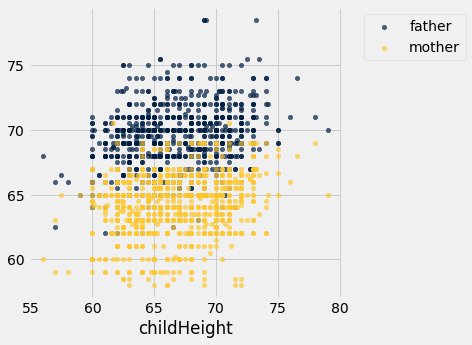

In [26]:
height.scatter('childHeight')

#### What do we see in this chart?

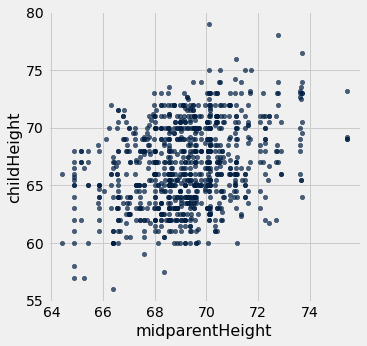

In [27]:
# let's use average heights from the galton table
# scatter plot with parent average on x-axis and child height on y-axis
galton.scatter('midparentHeight', 'childHeight')

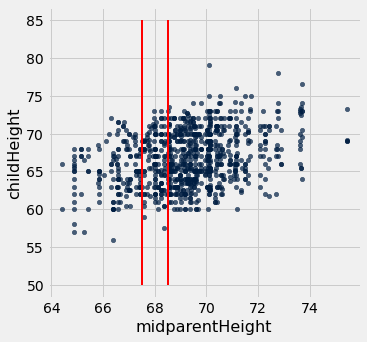

In [28]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [29]:
# let's compute the mean height of children in this range
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

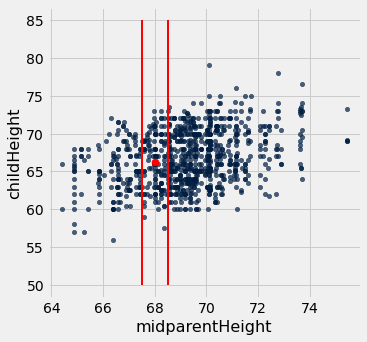

In [30]:
# Lets schow the mean child height 
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [31]:
# Now let's right a function to make this prediction in general

In [32]:
def predict_height(parentsMidHeight):
    nearby = galton.where('midparentHeight', are.between(parentsMidHeight - 0.5, parentsMidHeight + .5))
    nearby_mean = nearby.column('childHeight').mean()
    return nearby_mean

In [33]:
predict_height(68)

66.24045801526718

In [34]:
predict_height(74)

70.41578947368421

In [35]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [36]:
# Now lets test this function on some examples

In [37]:
# Now can we make this prediction on all our examples?

In [38]:
galton.apply(predict, 'midparentHeight')

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [39]:
# let's add the predictions to our galton table

In [40]:
galton = galton.with_column("predictedHeight",  galton.apply(predict, 'midparentHeight'))

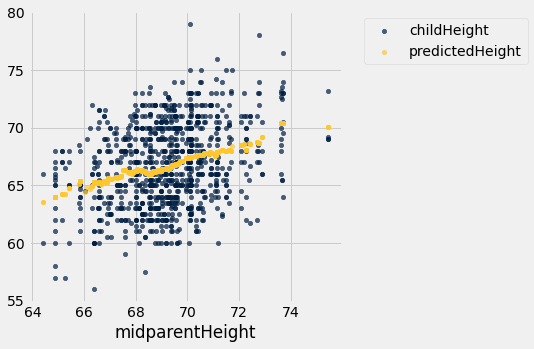

In [41]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

### Prediction Accuracy

In [42]:
# Let's write a function to predict the difference between 
# the prediction and the true value

In [43]:
galton.labels

('family',
 'father',
 'mother',
 'midparentHeight',
 'children',
 'childNum',
 'gender',
 'childHeight',
 'predictedHeight')

In [44]:
galton = galton.drop('child_prediction', 'predictHeight')

In [45]:
galton = galton.with_column('predictionError', abs(galton.column('predictedHeight') - galton.column('childHeight')))

### What type of plot should we use to show the errors

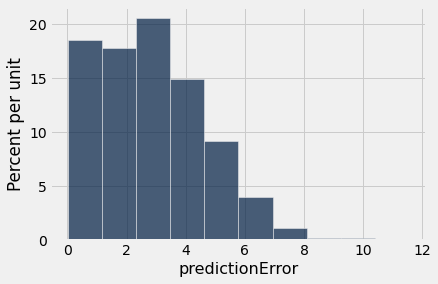

In [46]:
galton.hist('predictionError')

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


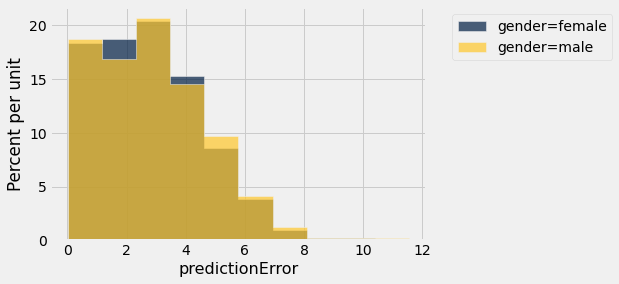

In [47]:
galton.hist('predictionError', group='gender', )

back to slides

# Group Multiple Columns

In [48]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


#### 1. For each city, what’s the tallest building for each material?

In [49]:
sky.drop('age').group(['city', 'material'], max)

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


city,material,name max,height max
Atlanta,concrete,Westin Peachtree Plaza,264.25
Atlanta,mixed/composite,Two Alliance Center,311.8
Atlanta,steel,State of Georgia Building,169.47
Austin,concrete,Windsor on the Lake,208.15
Austin,steel,University of Texas Tower,93.6
Baltimore,concrete,The John and Frances Angelos Law Center,161.24
Baltimore,steel,Mercy Medical Center Inpatient Tower,155.15
Boston,concrete,Harbor Towers II,121.92
Boston,mixed/composite,Ellison Building,139
Boston,steel,Two International Place,240.79


back to slides

# Pivot

#### 1. For each city, what’s the tallest building for each material?
Use pivot here!


In [50]:
sky_pivot = sky.pivot('material', 'city', 'height', max)
sky_pivot.show()

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


#### 2. For each city, what’s the height difference between the tallest steel building and the tallest concrete building?

Use sky_pivot

In [55]:
sky_pivot = sky_pivot.with_column( 'difference', abs(sky_pivot.column('steel') - sky_pivot.column('concrete')) ) 
sky_pivot

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


(back to slides)
# Joins

In [51]:
billionaires = Table.read_table('billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


In [52]:
countries = Table.read_table('countries.csv')
countries

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


### What can we join these two tables on?

##### How many billionaries are in a specific industry and Continent?

In [53]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_7_completed.ipynb", pdf=False)